In [111]:
import matplotlib.pyplot as pyplot
import math

In [112]:
def generate_sine_points(num_points, t = 96):
    points = []
    for i in range(num_points):
        # x = x_max * (i / (num_points - 1))  # Scale x from 0 to x_max
        x = i
        y = math.sin(2*math.pi / t * i)
        points.append(y)
    return points

# Example usage:
num_points = 69680  # Number of points to generate
t = 1000
points = generate_sine_points(num_points, t = t)

In [137]:
def generate_clean_non_station_sin_points(num_points, f, t = 96, amplitude = 1000):
    points = []
    for i in range(num_points):
        # x = x_max * (i / (num_points - 1))  # Scale x from 0 to x_max
        x = i
        y = amplitude * math.sin(2*math.pi / t * i) + f(x)
        points.append(y)
    return points

In [325]:
def identidy_e_n2(x):
    return x * 1e-2

In [326]:
n = 69680
t = 96
amplitude = 50
non_stat_x_points = generate_clean_non_station_sin_points(n, identidy_e_n3, amplitude = amplitude)

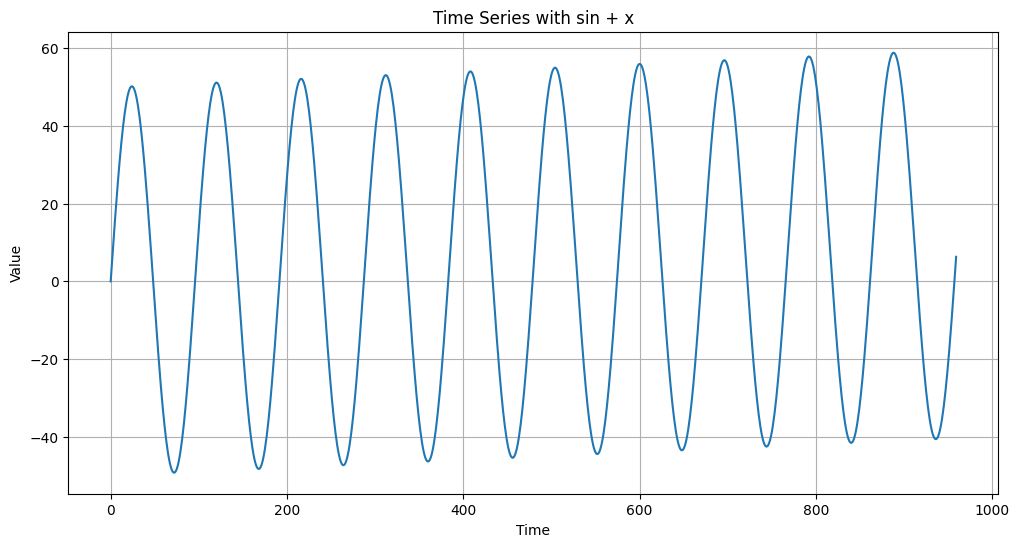

In [327]:
pyplot.figure(figsize=(12, 6))
pyplot.plot(non_stat_x_points[:10*t])
pyplot.title('Time Series with sin + x')
pyplot.xlabel('Time')
pyplot.ylabel('Value')
pyplot.grid(True)
pyplot.show()

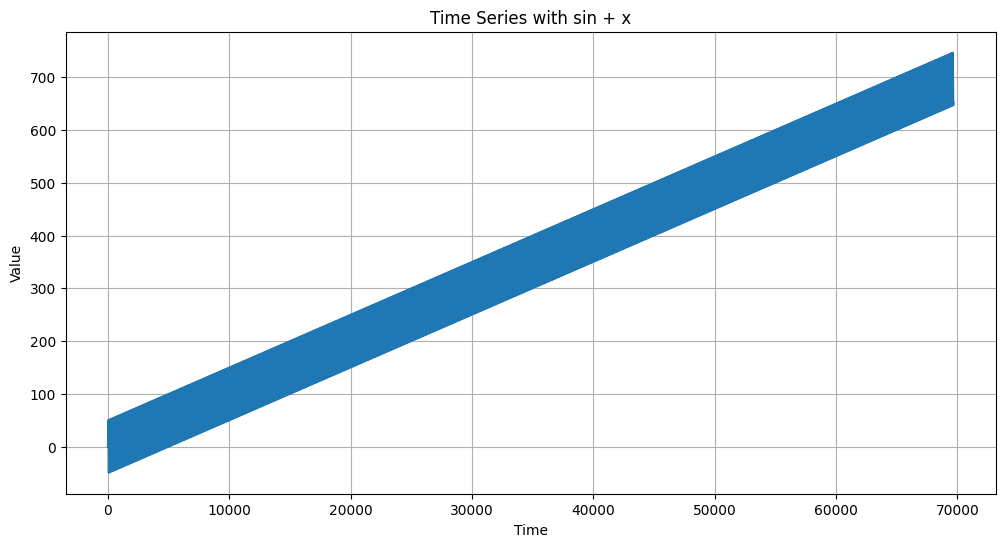

In [328]:
pyplot.figure(figsize=(12, 6))
pyplot.plot(non_stat_x_points)
pyplot.title('Time Series with sin + x')
pyplot.xlabel('Time')
pyplot.ylabel('Value')
pyplot.grid(True)
pyplot.show()

In [324]:
def generate_non_stationary_data(generate_function, length: int, period: int, data_path:str):
    import pandas as pd
    result = generate_function(num_points = length, t = period)
    print(f"result: {result[:20]}")
    df = pd.read_csv('dataset/ETT-small/ETTm2.csv')
    cut_df = df[:length]
    cut_df['OT'] = result
    cut_df = cut_df[['date', 'OT']]
    cut_df.to_csv(data_path, index=False) #'dataset/self_made/sin_on_line_10k.csv'
    return cut_df

In [143]:
def generate_stationary_data(generate_function, f, amplitude, length: int, period: int, data_path:str):
    import pandas as pd
    result = generate_function(num_points = length, t = period, f = f, amplitude = amplitude)
    print(f"result: {result[:20]}")
    df = pd.read_csv('dataset/ETT-small/ETTm2.csv')
    cut_df = df[:length]
    cut_df['OT'] = result
    cut_df = cut_df[['date', 'OT']]
    cut_df.to_csv(data_path, index=False) #'dataset/self_made/sin_on_line_10k.csv'
    return cut_df

In [329]:
sin_x = generate_stationary_data(generate_function = generate_clean_non_station_sin_points,
                         f = identidy_e_n2,
                         amplitude = 50,
                         length = 69680,
                         period = 96,
                         data_path = 'dataset/self_made/non_stat_data_sin_xen2_p96_amp50.csv')

result: [0.0, 3.280156461507153, 6.546309611002578, 9.784516100806412, 12.980952255126036, 16.121973265158076, 19.194171618254487, 22.184434510950062, 25.079999999999995, 27.868511650980107, 30.53807145043603, 33.07729075500344, 35.47533905932737, 37.72199037394886, 39.80766701456175, 41.72348061512726, 43.46127018922193, 45.01363707663442, 46.37397662556434, 47.53650647475528]


In [282]:
def x_sq_en7(x):
    return (x**2) * 1e-7

In [291]:
amplitude = 20
x_sq_p = generate_stationary_data(generate_function = generate_clean_non_station_sin_points,
                         f = x_sq_en7,
                         amplitude = amplitude,
                         length = 69680,
                         period = 96,
                         data_path = f'dataset/self_made/non_stat_data_sin_{x_sq_en7.__name__}_p{96}_amp{amplitude}.csv')

result: [0.0, 1.3080626846028613, 2.6105242444010313, 3.9018073403225646, 5.176382502050415, 6.428791806063231, 7.653672247301796, 8.845778704380026, 10.000006399999998, 11.111412760392044, 12.17523858017441, 13.186928402001376, 14.142150023730949, 15.036813049579546, 15.8670864058247, 16.6294147460509, 17.320533675688772, 17.937483730653764, 18.477623050225734, 18.93863868990211]


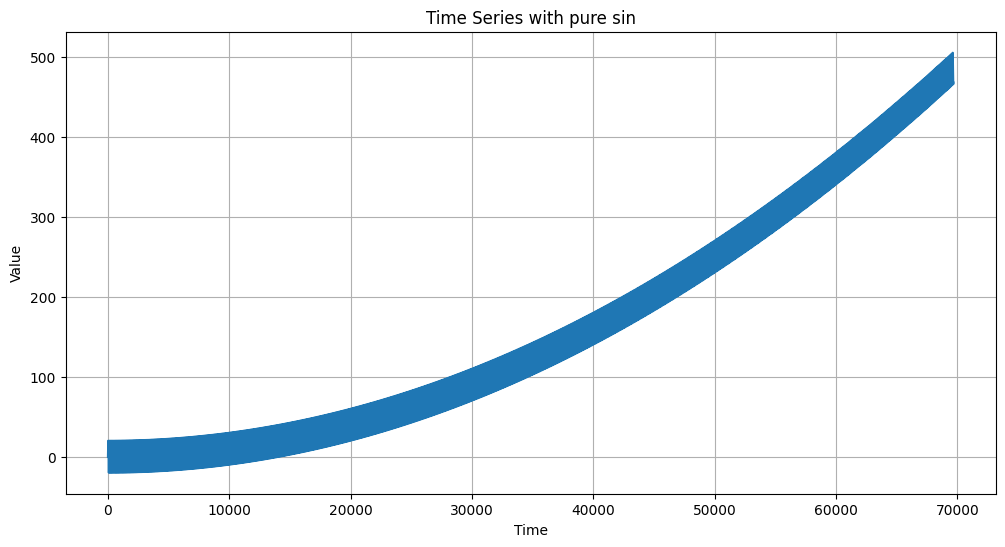

In [292]:
pyplot.figure(figsize=(12, 6))
pyplot.plot(x_sq_p["OT"])
pyplot.title('Time Series with pure sin')
pyplot.xlabel('Time')
pyplot.ylabel('Value')
pyplot.grid(True)
pyplot.show()

In [272]:
x_sq.__name__

'x_sq'

In [317]:
def sin_switch_p10k_apm50(x):
    return 50*math.sin(2*math.pi / 10000 * x)

amplitude_2 = 10
data_path = f'dataset/self_made/non_stat_data_sin_{sin_switch_p10k_apm50.__name__}_p{96}_amp{amplitude_2}.csv'
# data_path = "dataset/self_made/test.csv"
x_sin_sin = generate_stationary_data(generate_function = generate_clean_non_station_sin_points,
                                 f = sin_switch_p10k_apm50,
                                 amplitude = amplitude_2,
                                 length = 69680,
                                 period = 96,
                                 data_path = data_path)

result: [0.0, 0.6854472167702435, 1.368093758735632, 2.045150943957688, 2.7138540248753937, 3.3714740273255934, 4.015329436376218, 4.642797678931791, 5.251326353940942, 5.838444162116466, 6.401771488365153, 6.939030591611853, 7.448055358383329, 7.926800578385604, 8.373350702355319, 8.78592804468265, 9.162900395680918, 9.502788010905924, 9.804269947595756, 10.066189721097363]


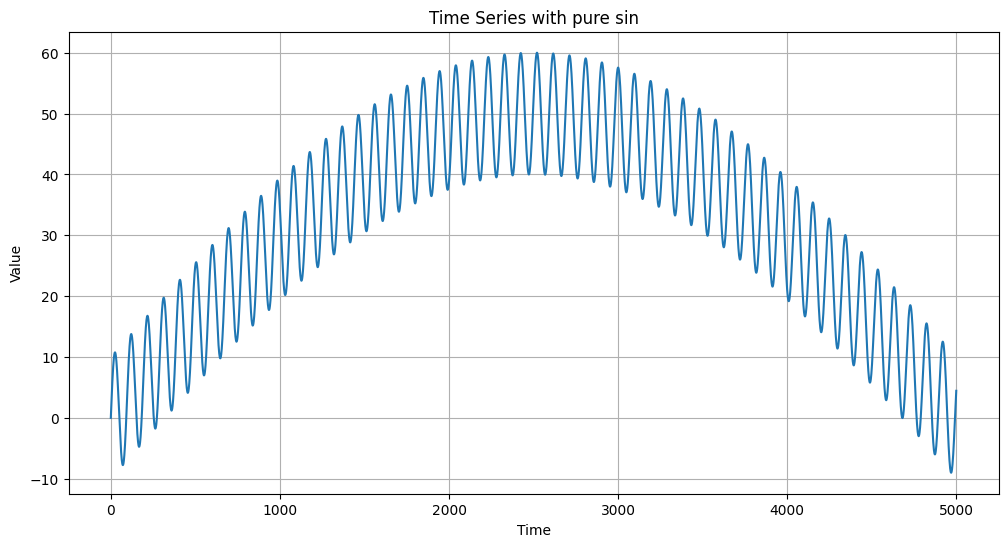

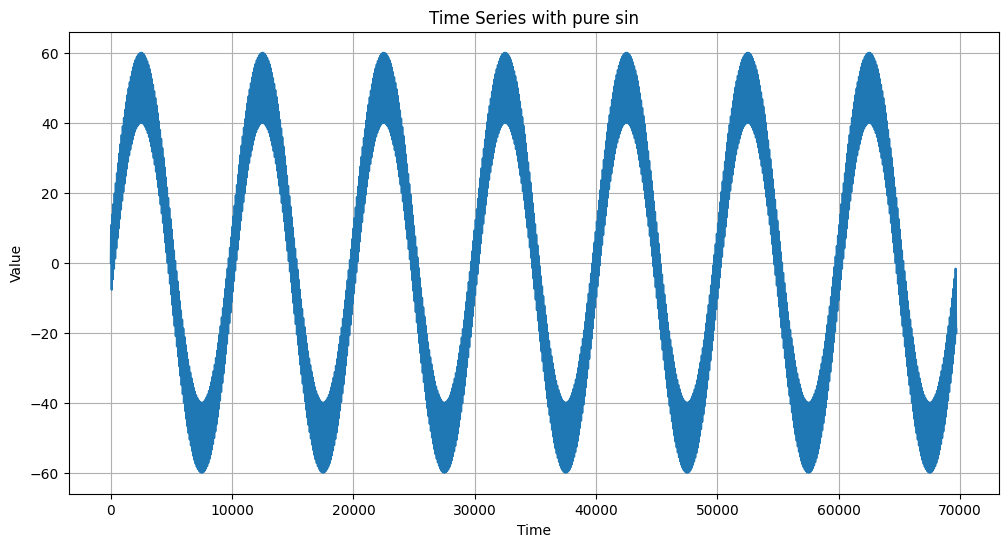

In [318]:
pyplot.figure(figsize=(12, 6))
pyplot.plot(x_sin_sin["OT"][:5000])
pyplot.title('Time Series with pure sin')
pyplot.xlabel('Time')
pyplot.ylabel('Value')
pyplot.grid(True)
pyplot.show()

pyplot.figure(figsize=(12, 6))
pyplot.plot(x_sin_sin["OT"])
pyplot.title('Time Series with pure sin')
pyplot.xlabel('Time')
pyplot.ylabel('Value')
pyplot.grid(True)
pyplot.show()


In [319]:
generate_stationary_data(generate_function = generate_sine_points, 
                         length = 69680, 
                         period = 500,
                         data_path = 'dataset/self_made/stationary_data_p500.csv')

TypeError: generate_stationary_data() missing 2 required positional arguments: 'f' and 'amplitude'